In [1]:
import pandas as pd
import json
import time
import geopandas as gpd
%pylab inline
import fiona
from shapely.geometry import Point, Polygon, shape, box
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

In [4]:
plt.rcParams.update({'font.size': 22})

In [5]:
atlantacity_zips = pd.read_csv('data/atlanta/median_income_city.csv')
# df = df[df.zips.isin(df_city_zips.name.iloc[1:].astype(int))].reset_index(drop=True)

In [6]:
city_list = ['atlanta','bogota','santiago','casablanca']
crs_i = 3857

In [7]:
gdf_dict = {}
for city in city_list:
    
    if city=='santiago':
        gdf_dict[city] = gpd.read_file('./data/'+city+'/'+city+'.geojson')
    else:
        gdf_dict[city] = gpd.read_file('./data/'+city+'/'+city+'.geojson').to_crs(epsg=crs_i)

In [8]:
gdf_dict['atlanta'] = gdf_dict['atlanta'][gdf_dict['atlanta'].name.isin(atlantacity_zips.name.iloc[1:])].reset_index(drop=True)
gdf_dict['atlanta']['income']=gdf_dict['atlanta']['B19013001']

In [9]:
gdf_dict['bogota']['income']=gdf_dict['bogota']['median_income']

In [10]:
gdf_dict['casablanca']['income']=gdf_dict['casablanca']['Taux_de_pauvretmultidimensionnelle2014']

In [11]:
gdf_dict['santiago']['income']=gdf_dict['santiago']['IngresoHogar']

In [12]:
sns.set_style('dark')

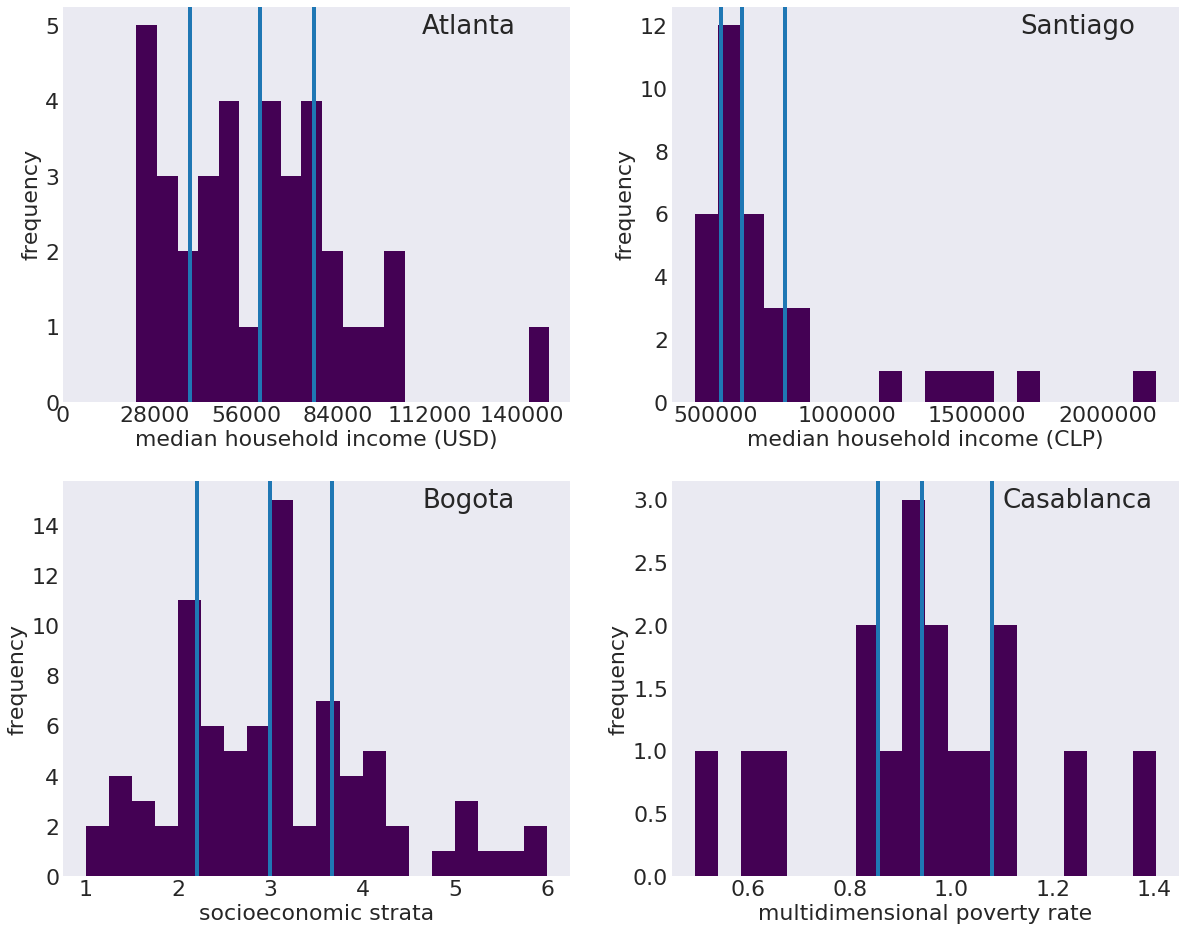

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20,16))

ax = ax.flatten()

##Atlanta
to_plot_gdf = gdf_dict['atlanta']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()

to_plot_gdf.income.plot(kind='hist', ax=ax[0], cmap='viridis', legend=False, 
                         linewidth=0.5, bins=20)
for q in [25, 50, 75]:
    ax[0].axvline(np.percentile(to_plot_gdf.income, q), linewidth=4)
# ax[0].set_xscale('log')
ax[0].set_xticks(np.linspace(ax[0].get_xticks()[0], ax[0].get_xticks()[-2], 6))

ax[0].text(0.8, 0.95, 'Atlanta', ha='center', va='center', transform=ax[0].transAxes, fontsize=26)
ax[0].set_ylabel('frequency', fontsize=22)
ax[0].set_xlabel('median household income (USD)', fontsize=22)
# ax[0].set_yticklabels([])
# ax[0].set_xticklabels([])

##Santiago
to_plot_gdf = gdf_dict['santiago']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()

to_plot_gdf.income.plot(kind='hist', ax=ax[1], cmap='viridis', legend=False, 
                         linewidth=0.5, bins=20)
for q in [25, 50, 75]:
    ax[1].axvline(np.percentile(to_plot_gdf.income, q), linewidth=4)
# ax[1].set_xscale('log')

ax[1].text(0.8, 0.95, 'Santiago', ha='center', va='center', transform=ax[1].transAxes, fontsize=26)


# ax[1].set_yticklabels([])
# ax[1].set_xticklabels([])

ax[1].set_ylabel('frequency', fontsize=22)
ax[1].set_xlabel('median household income (CLP)', fontsize=22)


##Bogota
to_plot_gdf = gdf_dict['bogota']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()

to_plot_gdf.income.plot(kind='hist', ax=ax[2], cmap='viridis', legend=False, 
                         linewidth=0.5, bins=20)
for q in [25, 50, 75]:
    ax[2].axvline(np.percentile(to_plot_gdf.income, q), linewidth=4)

ax[2].text(0.8, 0.95, 'Bogota', ha='center', va='center', transform=ax[2].transAxes, fontsize=26)

# ax[2].set_yticklabels([])
# ax[2].set_xticklabels([])
ax[2].set_ylabel('frequency', fontsize=22)
ax[2].set_xlabel('socioeconomic strata', fontsize=22)

##Casablanca
to_plot_gdf = gdf_dict['casablanca']
to_plot_gdf = to_plot_gdf[to_plot_gdf['income']>0.0]
min_v = to_plot_gdf['income'].min()
max_v = to_plot_gdf['income'].max()


to_plot_gdf.income.plot(kind='hist', ax=ax[3], cmap='viridis', legend=False, 
                         linewidth=0.5, bins=20)
for q in [25, 50, 75]:
    ax[3].axvline(np.percentile(to_plot_gdf.income, q), linewidth=4)

ax[3].text(0.8, 0.95, 'Casablanca', ha='center', va='center', transform=ax[3].transAxes, fontsize=26)

# ax[3].set_yticklabels([])
# ax[3].set_xticklabels([])
ax[3].set_ylabel('frequency', fontsize=22)
ax[3].set_xlabel('multidimensional poverty rate', fontsize=22)

plt.savefig('figures/Fig3_income_cities.pdf', bbox_inches='tight')